## 02-1. 훈련 세트와 테스트 세트 (p.66)
> `지도학습`
---
`테스트세트`, `훈련세트` => (테스트 데이터와 테스트 정답), (훈련 데이터와 훈련 정답)

In [62]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
#1-3과 달리 한번에 데이터 프레임 접근하기
cond = df['Species'].isin(['Bream', 'Smelt'])
lw_df = df.loc[cond, ['Length2', 'Weight']]

fish_data = lw_df.values.tolist()
#numpy의 array로 바뀌고(.values) => 그걸 리스트로 .tolist()

In [9]:
fish_target = [1] * 35 + [0] * 14
#정답지
#지금은 데이터가 몇 개인지 (각각 35개, 14개)를 알기 때문에 우선 이렇게 표현함

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kn = KNeighborsClassifier()
#알고리즘을 사용하려면 이렇게 인스턴스화 시켜야한다. (이름 = 어쩌고기능이름())

In [14]:
train_input = fish_data[:35]
#학습 인풋 데이터
train_target = fish_target[:35]
#학습 정답 데이터
#도미로(bream data)

test_input = fish_data[35:]
test_target = fish_target[35:]
#빙어로(Smelt)

In [16]:
kn.fit(train_input, train_target)
#학습을 시킬 때

KNeighborsClassifier()

In [19]:
kn.score(test_input, test_target)
#채점을 할 때
#0점
#왜냐하면, 지금 데이터를 학습 시킬 때, 도미로, 정답지를 빙어로 줬기 때문에 => `샘플링편향`
#따라서, 적절히 섞어서 훈련과 채점을 진행 해야한다. 

0.0

In [20]:
#vscode에서 `numpy` 설치 하고 오기
#파이썬 리스트를 넘파이 (numpy) 배열로 바꿔서 
#랜덤하게 섞어서 (학습데이터와 정답데이터를) 샘플링 편향을 수정하기 위해

In [41]:
import numpy as np

In [42]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
#list리스트를 numpy의 2차원 넘파이 배열로

In [43]:
np.random.seed(42)
#seed를 줌으로써 모두 동일한 랜덤값을 얻음.
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [44]:
input_arr[[1, 3]]
#fancy indexing

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [45]:
train_input = input_arr[index[:35]]
#우리가 가진 원본 데이터를 그대로 사용하는게 아니라
#한 번 랜덤하게 (index를) 섞은 다음에 
#그것을 train 훈련/ 학습용 데이터로
train_target = target_arr[index[:35]]

In [46]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

#지금은 한땀한땀 보기위해 일부로 코드를 복잡하게, 일일히 적는중
#이후에 method를 써서 한번에 실행하는 방법을 배울 것임

In [47]:
import matplotlib.pyplot as plt
#산점도 라이브러리 사용을 위한 과정

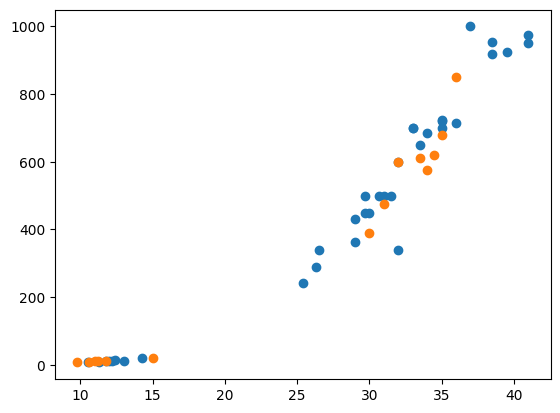

In [48]:
plt.scatter(train_input[:, 0], train_input[:, 1])
#산점도 확인을 위해
#전체 데이터 중에 0번째 데이터가 길이, 1번째 데이터가 무게이다.
plt.scatter(test_input[:, 0], test_input[:, 1])

In [49]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [50]:
kn.score(test_input, test_target)

1.0

In [52]:
kn.predict(test_input)
#어떻게 예측을 했는지를 확인 해보는 중

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

---

## iris
- 지금까지의 로직logic을 다른 데이터를 통해 연습하기
- 트레이닝 dataset, 테스트 dataset을 구분한다가 관건!

In [106]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#setosa, versicolor 종 분류
#petal_lenght, petal_width 특성 기준으로

In [113]:
cond = iris['species']. isin(['setosa', 'versicolor'])
lw_iris = iris.loc[cond, ['petal_length', 'petal_width']]

iris_data = lw_iris.values.tolist()

In [114]:
iris_target = [1] * 50 + [0] * 50

#### 아래 코드는 강사님이 하신 방법 (# 표시)

In [ ]:
# setosa_count = iris.loc[iris['species'] == 'setosa'].shape[0]
# versicolor_count = iris.loc[iris['species'] == 'versicolor'].shape[0]
# #.shape을 통해 전체 데이터의 개수를 호출한다. 
# #나는 위의 방법으로 데이터를 세서 진행했었지만, 수정! shape으로 데이터 개수 알아내기

# #fancy indexing을 아래에서 쓰기 위해
# import numpy as np
# iris_target = np.array([1] * setosa_count + [0] * versicolor_count)

# #numpy 를 통해 array를 하지 않고, 섞기를 python의 random shuffle로 해보는 방법

# import random

# index = list(range(setosa_count + versicolor_count))
# random.shuffle(index)
# #index

# train_input = iris_data[index[:70]]
# train_target = iris_target[index[:70]]

# test_imput = iris_target[index[70:]]
# test_target = iris_target[index[70:]]

# plt.scatter(train_input[:, 0], train_input[:, 1])
# plt.scatter(test_input[:, 0], test_input[:, 1])

In [115]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
# train_input = iris_data[:50]
# train_target = iris_target[:50]

In [116]:
import numpy as np
input_arr = np.array(iris_data)
target_arr = np.array(iris_target)

np.random.seed(42)
index = np.arange(99)
np.random.shuffle(index)
print(index)

[62 40 95 18 97 84 64 42 10  0 31 76 47 26 44  4 22 12 88 73 49 70 68 15
 39 33  9 81 11 65 94 30 28 89  5 45 69 35 16 72 34  7 55 27 19 80 25 53
 13 24  3 17 38  8 77  6 79 36 91 56 98 54 43 50 66 46 67 61 96 78 41 58
 48 85 57 75 32 93 59 63 83 37 29  1 52 21  2 23 87 90 74 86 82 20 60 71
 14 92 51]


In [117]:
train_input = input_arr[index[:50]]
train_target = target_arr[index[:50]]

test_target = target_arr[index[50:]]
test_input = input_arr[index[50:]]

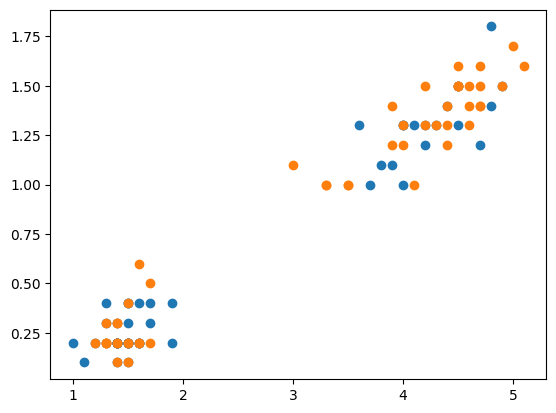

In [118]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [107]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [108]:
kn.score(test_input, test_target)

1.0